In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Data Import
The google sheet was downloaded as a .csv file, and read in using the Python Pandas library.

In [2]:
raw_data = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [3]:
display(raw_data)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


## Data Exploration

Exploration of aggregate statistics reveals a large standard deviation for the order_amount column. Additionally, the mean order value of \\$3145.13 is well above the median  order value of \\$284.00 dollars.

This indicates there are outliers in the data that are either errors, or not representative of typical customer purchases. 

In [4]:
raw_data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


### Confirmation of outliers causing the issue
Calculating the percentile values reveals a dramatic difference, four orders of magnitude, between the largest 1% of values and the rest of the data set. 

In [5]:
# calculate the percentile for each integer value 1 to 100
values = []
for value in range(1,101):
    percentile = raw_data['order_amount'].quantile(q=(value/100))
    values.append(percentile)

Text(0, 0.5, 'Order Value ($)')

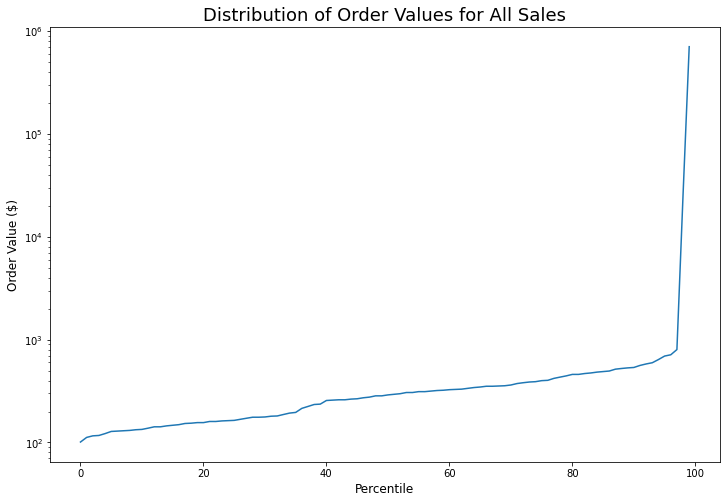

In [6]:
# plot the percentiles on a log10 scale to properly view the distribution
values_df = pd.DataFrame(values[0:101])
values_df.plot(logy=True, legend=False, figsize=(12,8))

# improve the format of the visualization
plt.title('Distribution of Order Values for All Sales', fontsize=18)
plt.xlabel('Percentile', fontsize=12)
plt.ylabel('Order Value ($)', fontsize=12)

### Identification of specific values for outliers
Diving deeper into the data, we see that there are 63 orders with a value or \\$25,000 or more, with the remaining 4937 orders having a value of \\$1,760 or less.

In [7]:
# group the data by order amount to identify the exact cutoff point of questionable data.
(raw_data.groupby(['order_amount'])
            .agg({'order_amount':'count'})
            .rename(columns={'order_amount':'# Orders'})
            .sort_index(ascending=False)
            .head(10))


,# Orders
order_amount,
704000,17
154350,1
102900,1
77175,9
51450,16
25725,19
1760,1
1408,2
1086,1


## Solution
Flag orders with a value of \\$25,000 or more as a separate customer scenario (or possibly bad data), and analyze only the bottom 99% of values.

In [8]:
# filter out rows with erroneous order amount column values
bottom_dataset = raw_data[(raw_data['order_amount'] < 25000)]

Text(0, 0.5, 'Order Value ($)')

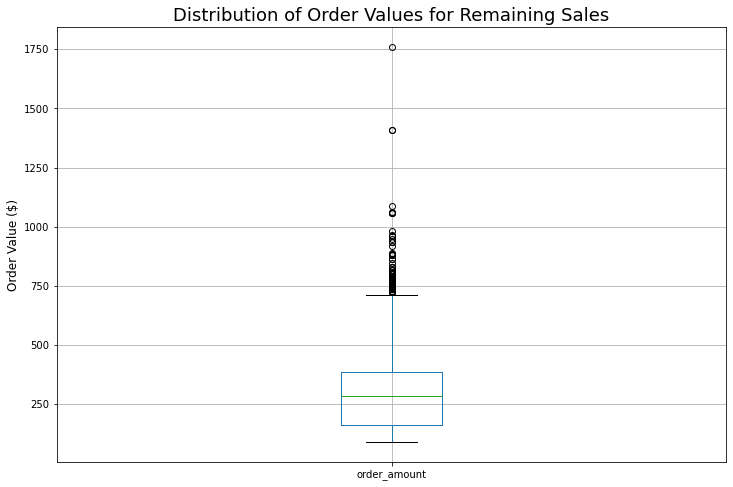

In [9]:
# Create a boxplot to visualize the distribution of the remaining data
bottom_dataset.boxplot(column=['order_amount'], figsize=(12,8))

# improve the format of the visualization
plt.title('Distribution of Order Values for Remaining Sales', fontsize=18)
plt.xlabel('')
plt.ylabel('Order Value ($)', fontsize=12)

In [10]:
# compute aggregate statistics for the order_amount column
bottom_dataset['order_amount'].describe()

count    4937.000000
mean      302.580514
std       160.804912
min        90.000000
25%       163.000000
50%       284.000000
75%       387.000000
max      1760.000000
Name: order_amount, dtype: float64

We see that the Average Order Value (AOV) is now in good agreement with the median value. The standard deviation is still relatively large, at \\$160, but is in line with the value of shoes being in the $100s of dollars price range.